<a href="https://colab.research.google.com/github/Miyaputri/Stasiun-Klimatologi-Banten/blob/main/Preprocessing_Stasiun_Klimatologi_Banten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [1]:
# Unduh semua file CSV
!wget https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Merge%202020.csv
!wget https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Merge%202021.csv
!wget https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Merge%202022.csv
!wget https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Merge%202023.csv
!wget https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Merge%202024.csv

--2025-01-09 02:40:32--  https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Merge%202020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17322 (17K) [text/plain]
Saving to: ‘Stasiun Klimatologi Banten - Merge 2020.csv.5’

Stasiun Klimatologi 100%[===================>]  16.92K  --.-KB/s    in 0.001s  

2025-01-09 02:40:33 (29.7 MB/s) - ‘Stasiun Klimatologi Banten - Merge 2020.csv.5’ saved [17322/17322]

--2025-01-09 02:40:33--  https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Merge%202021.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, .

In [2]:
import pandas as pd

# Baca file CSV
data_2020 = pd.read_csv("Stasiun Klimatologi Banten - Merge 2020.csv")
data_2021 = pd.read_csv("Stasiun Klimatologi Banten - Merge 2021.csv")
data_2022 = pd.read_csv("Stasiun Klimatologi Banten - Merge 2022.csv")
data_2023 = pd.read_csv("Stasiun Klimatologi Banten - Merge 2023.csv")
data_2024 = pd.read_csv("Stasiun Klimatologi Banten - Merge 2024.csv")

## Preprocessing

### 2020

In [3]:
data_2020

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2020,22.6,27,24.6,98,208.9,4.3,2,230,1,C
1,02-01-2020,23.2,30.1,26.6,90,43.9,0,4,280,2,W
2,03-01-2020,-,30.4,27.7,86,1.3,6,4,300,3,W
3,04-01-2020,25,30.5,27.4,88,1,2.4,4,250,2,W
4,05-01-2020,24.8,28.8,27.3,88,0.2,0.5,3,300,1,C
...,...,...,...,...,...,...,...,...,...,...,...
366,27-12-2020,-,33.7,29,74,0,5.7,4,240,2,SW
367,28-12-2020,25.4,32.8,28.1,77,-,6.8,5,240,3,SW
368,29-12-2020,24.8,30.8,27.1,82,0.1,6.1,7,240,3,SW
369,30-12-2020,24.6,30.8,27,81,0.3,1.4,4,260,2,W


In [4]:
data_2020 = data_2020.drop(['DDD_CAR', 'FF_AVG', 'DDD_X', 'FF_X', 'TX', 'TN'], axis=1)

In [5]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  371 non-null    object
 1   TAVG     371 non-null    object
 2   RH_AVG   371 non-null    object
 3   RR       371 non-null    object
 4   SS       371 non-null    object
dtypes: object(5)
memory usage: 14.6+ KB


In [6]:
# Ubah tipe data
data_2020['TANGGAL'] = pd.to_datetime(data_2020['TANGGAL'], format="%d-%m-%Y")
data_2020['TAVG'] = pd.to_numeric(data_2020['TAVG'],errors='coerce')
data_2020['RH_AVG'] = pd.to_numeric(data_2020['RH_AVG'],errors='coerce')
data_2020['RR'] = pd.to_numeric(data_2020['RR'],errors='coerce')
data_2020['SS'] = pd.to_numeric(data_2020['SS'],errors='coerce')

In [7]:
import numpy as np

# Pilih semua kolom kecuali 'Tanggal'
clean_2020 = data_2020.columns.difference(['Tanggal'])

# Ganti nilai kosong menjadi NaN di kolom yang dipilih
data_2020[clean_2020] = data_2020[clean_2020].replace(["", " ", "-", 8888, 9999, 8888.0, 9999.0], np.nan)

In [8]:
# Statistik deskriptif
data_2020.describe()

,TANGGAL,TAVG,RH_AVG,RR,SS
count,371,367.000000,370.000000,242.000000,369.000000
mean,2020-07-03 04:35:34.770889728,28.219074,79.291892,11.387190,4.939295
min,2020-01-01 00:00:00,24.600000,53.000000,0.000000,0.000000
25%,2020-04-02 12:00:00,27.350000,74.250000,0.100000,2.700000
50%,2020-07-04 00:00:00,28.200000,80.000000,2.650000,5.100000
75%,2020-10-03 12:00:00,28.900000,85.000000,14.575000,7.300000
max,2020-12-31 00:00:00,31.900000,98.000000,208.900000,10.300000
std,NaN,1.259246,7.748149,21.536644,2.896709


In [9]:
data_2020.isnull().sum()

,0
TANGGAL,0
TAVG,4
RH_AVG,1
RR,129
SS,2


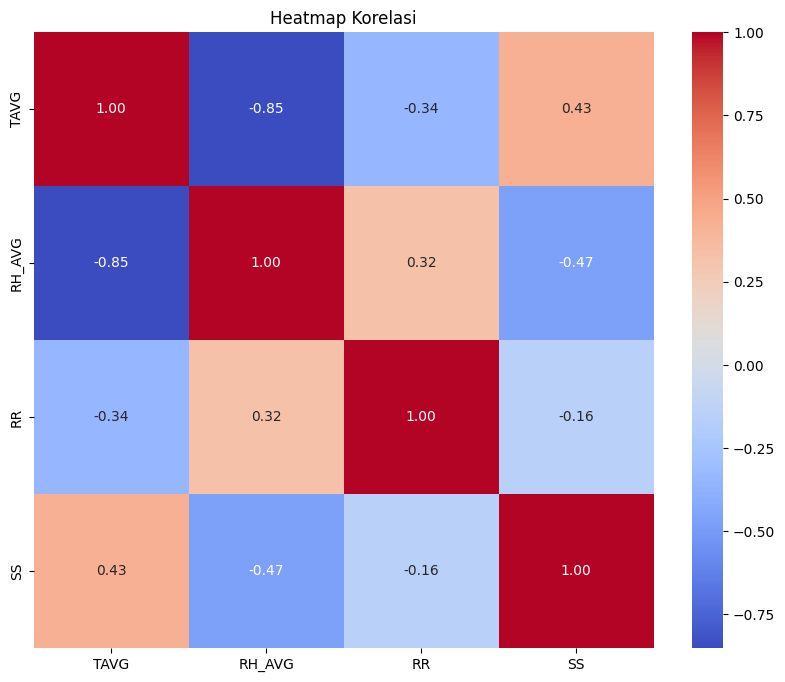

In [10]:
# Menghitung matriks korelasi
correlation_matrix = data_2020.corr(numeric_only=True)

# Menampilkan matriks korelasi
correlation_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

In [11]:
# Menghitung rata-rata berdasarkan bulan
import pandas as pd

# Tambahkan kolom "BULAN" berdasarkan kolom TANGGAL
data_2020['BULAN'] = data_2020['TANGGAL'].dt.month

# Kelompokkan berdasarkan bulan dan hitung rata-rata untuk setiap variabel
data2_2020 = data_2020.groupby('BULAN')[['TAVG', 'RH_AVG', 'RR', 'SS']].mean()

# Reset index untuk membuatnya lebih rapi (opsional)
data2_2020 = data2_2020.reset_index()

# Tampilkan hasil
print("Rata-rata bulanan:")
data2_2020

Rata-rata bulanan:


,BULAN,TAVG,RH_AVG,RR,SS
0,1,27.363333,86.400000,16.730769,3.446667
1,2,27.093103,87.103448,20.540909,2.903448
2,3,27.809677,83.935484,12.600000,4.203226
3,4,28.183333,82.766667,14.500000,5.246667
4,5,28.583871,80.419355,9.894444,4.758065
5,6,28.706667,76.500000,2.813333,5.190000
6,7,28.373333,74.193548,2.962500,5.803226
7,8,28.506897,74.032258,4.761111,7.019355
8,9,30.453333,66.333333,10.635294,6.450000
9,10,27.924242,79.181818,23.322727,5.253125


In [12]:
# Hitung baseline tahunan untuk setiap bulan (rata-rata suhu bulanan per bulan)
baseline_tahun = data2_2020.groupby('BULAN')['TAVG'].mean().reset_index()
baseline_tahun.rename(columns={'TAVG': 'baseline_tahun'}, inplace=True)

# Gabungkan baseline dengan data bulanan
data2_2020 = pd.merge(data2_2020, baseline_tahun, on='BULAN')
data2_2020['Anomali_Suhu'] = data2_2020['TAVG'] - data2_2020['baseline_tahun']

# Cetak hasil
data2_2020

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu
0,1,27.363333,86.400000,16.730769,3.446667,27.363333,0.0
1,2,27.093103,87.103448,20.540909,2.903448,27.093103,0.0
2,3,27.809677,83.935484,12.600000,4.203226,27.809677,0.0
3,4,28.183333,82.766667,14.500000,5.246667,28.183333,0.0
4,5,28.583871,80.419355,9.894444,4.758065,28.583871,0.0
5,6,28.706667,76.500000,2.813333,5.190000,28.706667,0.0
6,7,28.373333,74.193548,2.962500,5.803226,28.373333,0.0
7,8,28.506897,74.032258,4.761111,7.019355,28.506897,0.0
8,9,30.453333,66.333333,10.635294,6.450000,30.453333,0.0
9,10,27.924242,79.181818,23.322727,5.253125,27.924242,0.0


In [13]:
data2_2020['TAHUN'] = data_2020['TANGGAL'].dt.year

data2_2020

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu,TAHUN
0,1,27.363333,86.400000,16.730769,3.446667,27.363333,0.0,2020
1,2,27.093103,87.103448,20.540909,2.903448,27.093103,0.0,2020
2,3,27.809677,83.935484,12.600000,4.203226,27.809677,0.0,2020
3,4,28.183333,82.766667,14.500000,5.246667,28.183333,0.0,2020
4,5,28.583871,80.419355,9.894444,4.758065,28.583871,0.0,2020
5,6,28.706667,76.500000,2.813333,5.190000,28.706667,0.0,2020
6,7,28.373333,74.193548,2.962500,5.803226,28.373333,0.0,2020
7,8,28.506897,74.032258,4.761111,7.019355,28.506897,0.0,2020
8,9,30.453333,66.333333,10.635294,6.450000,30.453333,0.0,2020
9,10,27.924242,79.181818,23.322727,5.253125,27.924242,0.0,2020


### 2021

In [14]:
data_2021

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2021,23.8,29.8,25.7,92,26.8,0.4,3,280,1,C
1,02-01-2021,23.2,31.8,27.3,83,33.8,2.9,3,260,2,W
2,03-01-2021,23,32.8,27.9,79,-,5.2,5,240,3,SW
3,04-01-2021,24.8,32.6,27.9,81,1.5,5.2,4,240,3,SW
4,05-01-2021,25,30.4,26.7,87,-,6.2,5,260,1,C
...,...,...,...,...,...,...,...,...,...,...,...
372,27-12-2021,24.8,32.4,29.2,77,8888,5.3,4,100,2,SW
373,28-12-2021,24.8,30.8,28.2,83,0.5,5.5,3,210,1,C
374,29-12-2021,23.2,30.8,28.4,81,26.5,1.9,3,240,1,SW
375,30-12-2021,25.2,31.0,29.0,80,8888,2.5,3,190,1,C


In [15]:
data_2021 = data_2021.drop(['DDD_CAR', 'FF_AVG', 'DDD_X', 'FF_X', 'TX', 'TN'], axis=1)

In [16]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  377 non-null    object 
 1   TAVG     377 non-null    float64
 2   RH_AVG   377 non-null    int64  
 3   RR       377 non-null    object 
 4   SS       377 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 14.9+ KB


In [17]:
data_2021['TANGGAL'] = pd.to_datetime(data_2021['TANGGAL'], format="%d-%m-%Y")
data_2021['TAVG'] = pd.to_numeric(data_2021['TAVG'],errors='coerce')
data_2021['RH_AVG'] = pd.to_numeric(data_2021['RH_AVG'],errors='coerce')
data_2021['RR'] = pd.to_numeric(data_2021['RR'],errors='coerce')
data_2021['SS'] = pd.to_numeric(data_2021['SS'],errors='coerce')

In [18]:
import numpy as np

# Pilih semua kolom kecuali 'Tanggal'
clean_2021 = data_2021.columns.difference(['Tanggal'])

# Ganti nilai kosong menjadi NaN di kolom yang dipilih
data_2021[clean_2021] = data_2021[clean_2021].replace(["", " ", "-", 8888, 9999, 8888.0, 9999.0], np.nan)

In [19]:
data_2021.isnull().sum()

,0
TANGGAL,0
TAVG,0
RH_AVG,0
RR,113
SS,2


In [20]:
# Statistik deskriptif
data_2021.describe()

,TANGGAL,TAVG,RH_AVG,RR,SS
count,377,377.000000,377.00000,264.000000,375.000000
mean,2021-07-01 10:37:52.679045120,27.891512,80.34748,12.120076,4.957600
min,2021-01-01 00:00:00,24.700000,61.00000,0.000000,0.000000
25%,2021-04-02 00:00:00,27.100000,76.00000,0.000000,2.900000
50%,2021-07-02 00:00:00,28.000000,80.00000,2.950000,5.100000
75%,2021-09-28 00:00:00,28.700000,85.00000,17.000000,7.000000
max,2021-12-31 00:00:00,32.500000,94.00000,118.900000,12.500000
std,NaN,1.170053,6.27378,20.056076,2.722463


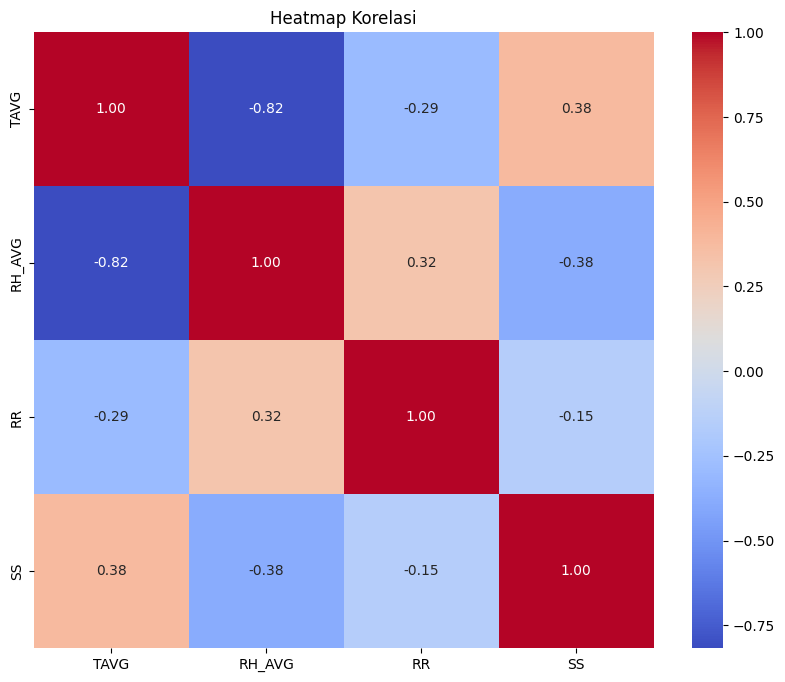

In [21]:
# Menghitung matriks korelasi
correlation_matrix2 = data_2021.corr(numeric_only=True)

# Menampilkan matriks korelasi
correlation_matrix2

import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

In [22]:
# Menghitung rata-rata berdasarkan bulan
import pandas as pd

# Tambahkan kolom "BULAN" berdasarkan kolom TANGGAL
data_2021['BULAN'] = data_2021['TANGGAL'].dt.month

# Kelompokkan berdasarkan bulan dan hitung rata-rata untuk setiap variabel
data2_2021 = data_2021.groupby('BULAN')[['TAVG', 'RH_AVG', 'RR', 'SS']].mean()

# Reset index untuk membuatnya lebih rapi (opsional)
data2_2021 = data2_2021.reset_index()

# Tampilkan hasil
print("Rata-rata bulanan:")
data2_2021

Rata-rata bulanan:


,BULAN,TAVG,RH_AVG,RR,SS
0,1,26.558065,86.580645,12.020000,2.232258
1,2,26.803448,86.586207,18.618519,3.789655
2,3,27.600000,82.060606,5.414286,4.821212
3,4,28.106667,79.700000,11.950000,6.083333
4,5,28.318182,80.909091,17.800000,6.033333
5,6,27.477419,84.354839,18.018182,4.393548
6,7,28.112121,76.484848,6.952941,6.215152
7,8,28.087879,76.151515,9.705263,6.254545
8,9,28.521875,75.031250,4.581818,6.206250
9,10,28.374194,77.677419,8.114286,5.226667


In [23]:
# Hitung baseline tahunan untuk setiap bulan (rata-rata suhu bulanan per bulan)
baseline_tahun = data2_2021.groupby('BULAN')['TAVG'].mean().reset_index()
baseline_tahun.rename(columns={'TAVG': 'baseline_tahun'}, inplace=True)

# Gabungkan baseline dengan data bulanan
data2_2021 = pd.merge(data2_2021, baseline_tahun, on='BULAN')
data2_2021['Anomali_Suhu'] = data2_2021['TAVG'] - data2_2021['baseline_tahun']

# Cetak hasil
data2_2021

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu
0,1,26.558065,86.580645,12.020000,2.232258,26.558065,0.0
1,2,26.803448,86.586207,18.618519,3.789655,26.803448,0.0
2,3,27.600000,82.060606,5.414286,4.821212,27.600000,0.0
3,4,28.106667,79.700000,11.950000,6.083333,28.106667,0.0
4,5,28.318182,80.909091,17.800000,6.033333,28.318182,0.0
5,6,27.477419,84.354839,18.018182,4.393548,27.477419,0.0
6,7,28.112121,76.484848,6.952941,6.215152,28.112121,0.0
7,8,28.087879,76.151515,9.705263,6.254545,28.087879,0.0
8,9,28.521875,75.031250,4.581818,6.206250,28.521875,0.0
9,10,28.374194,77.677419,8.114286,5.226667,28.374194,0.0


In [24]:
data2_2021['TAHUN'] = data_2021['TANGGAL'].dt.year

data2_2021

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu,TAHUN
0,1,26.558065,86.580645,12.020000,2.232258,26.558065,0.0,2021
1,2,26.803448,86.586207,18.618519,3.789655,26.803448,0.0,2021
2,3,27.600000,82.060606,5.414286,4.821212,27.600000,0.0,2021
3,4,28.106667,79.700000,11.950000,6.083333,28.106667,0.0,2021
4,5,28.318182,80.909091,17.800000,6.033333,28.318182,0.0,2021
5,6,27.477419,84.354839,18.018182,4.393548,27.477419,0.0,2021
6,7,28.112121,76.484848,6.952941,6.215152,28.112121,0.0,2021
7,8,28.087879,76.151515,9.705263,6.254545,28.087879,0.0,2021
8,9,28.521875,75.031250,4.581818,6.206250,28.521875,0.0,2021
9,10,28.374194,77.677419,8.114286,5.226667,28.374194,0.0,2021


### 2022

In [25]:
data_2022

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2022,24.8,32.3,28.2,80,0.7,5.1,5,230,3,SW
1,02-01-2022,25.2,32.6,27.9,82,0,8.5,5,240,2,SW
2,03-01-2022,23.6,34.6,28.9,79,-,3.2,4,240,2,SW
3,04-01-2022,24.2,33.4,28.2,74,-,9.1,3,160,1,C
4,05-01-2022,24.4,32.6,28.5,76,0,5.1,3,240,1,C
...,...,...,...,...,...,...,...,...,...,...,...
360,27-12-2022,22.2,28.6,25.1,92,22.3,0.0,4,210,2,SW
361,28-12-2022,23.1,29.4,25.2,91,0.3,1.7,5,250,3,SW
362,29-12-2022,22.2,28.2,25.2,92,26.1,1.0,5,300,2,C
363,30-12-2022,23.2,27.6,25.3,94,8.9,0.2,3,330,1,C


In [26]:
data_2022 = data_2022.drop(['DDD_CAR', 'FF_AVG', 'DDD_X', 'FF_X', 'TX', 'TN'], axis=1)

In [27]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  365 non-null    object 
 1   TAVG     365 non-null    object 
 2   RH_AVG   365 non-null    int64  
 3   RR       365 non-null    object 
 4   SS       365 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ KB


In [28]:
data_2022['TANGGAL'] = pd.to_datetime(data_2022['TANGGAL'], format="%d-%m-%Y")
data_2022['TAVG'] = pd.to_numeric(data_2022['TAVG'],errors='coerce')
data_2022['RH_AVG'] = pd.to_numeric(data_2022['RH_AVG'],errors='coerce')
data_2022['RR'] = pd.to_numeric(data_2022['RR'],errors='coerce')
data_2022['SS'] = pd.to_numeric(data_2022['SS'],errors='coerce')

In [29]:
import numpy as np

# Pilih semua kolom kecuali 'Tanggal'
clean_2022 = data_2022.columns.difference(['Tanggal'])

# Ganti nilai kosong menjadi NaN di kolom yang dipilih
data_2022[clean_2022] = data_2022[clean_2022].replace(["", " ", "-", 8888, 9999, 8888.0, 9999.0], np.nan)

In [30]:
data_2022.isnull().sum()

,0
TANGGAL,0
TAVG,1
RH_AVG,0
RR,149
SS,0


In [31]:
# Statistik deskriptif
data_2022.describe()

,TANGGAL,TAVG,RH_AVG,RR,SS
count,365,364.000000,365.000000,216.000000,365.000000
mean,2022-07-01 23:59:59.999999744,27.591209,83.832877,13.347222,4.206027
min,2022-01-01 00:00:00,24.900000,68.000000,0.000000,0.000000
25%,2022-04-02 00:00:00,27.000000,80.000000,1.000000,2.000000
50%,2022-07-02 00:00:00,27.700000,84.000000,5.500000,4.200000
75%,2022-10-01 00:00:00,28.400000,87.000000,21.700000,6.300000
max,2022-12-31 00:00:00,29.900000,97.000000,123.800000,9.800000
std,NaN,1.021278,4.735535,18.401021,2.628002


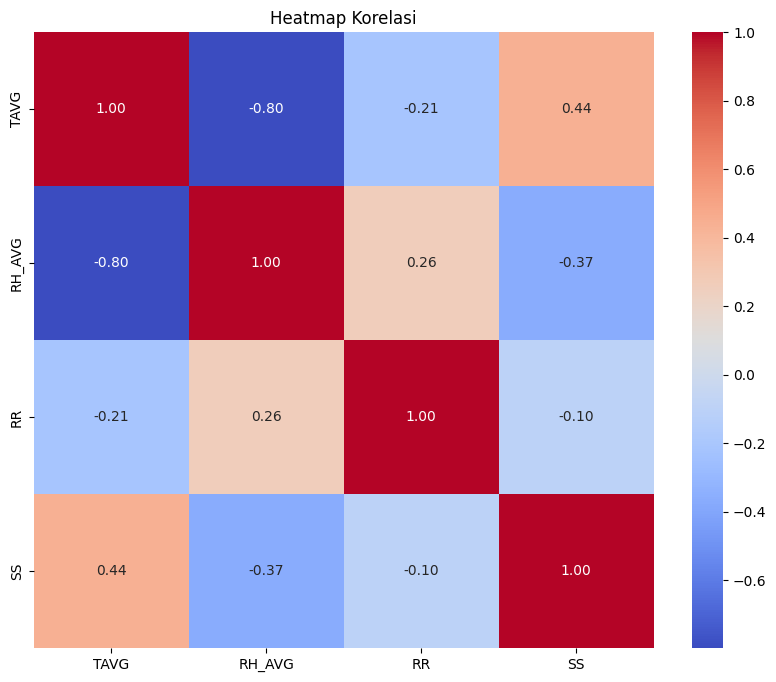

In [32]:
# Menghitung matriks korelasi
correlation_matrix3 = data_2022.corr(numeric_only=True)

# Menampilkan matriks korelasi
correlation_matrix3

import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

In [33]:
# Menghitung rata-rata berdasarkan bulan
import pandas as pd

# Tambahkan kolom "BULAN" berdasarkan kolom TANGGAL
data_2022['BULAN'] = data_2022['TANGGAL'].dt.month

# Kelompokkan berdasarkan bulan dan hitung rata-rata untuk setiap variabel
data2_2022 = data_2022.groupby('BULAN')[['TAVG', 'RH_AVG', 'RR', 'SS']].mean()

# Reset index untuk membuatnya lebih rapi (opsional)
data2_2022 = data2_2022.reset_index()

# Tampilkan hasil
print("Rata-rata bulanan:")
data2_2022

Rata-rata bulanan:


,BULAN,TAVG,RH_AVG,RR,SS
0,1,27.554839,82.322581,6.226087,4.441935
1,2,27.107143,83.857143,8.455000,3.035714
2,3,27.503333,83.258065,11.904348,3.693548
3,4,27.720000,82.466667,10.271429,5.200000
4,5,28.016129,82.387097,11.905000,4.309677
5,6,27.040000,84.066667,15.184211,4.023333
6,7,28.222581,80.806452,15.210000,5.403226
7,8,28.274194,83.064516,14.470000,6.041935
8,9,27.596667,84.733333,17.141176,4.480000
9,10,27.470968,86.096774,16.541176,3.583871


In [34]:
# Hitung baseline tahunan untuk setiap bulan (rata-rata suhu bulanan per bulan)
baseline_tahun = data2_2022.groupby('BULAN')['TAVG'].mean().reset_index()
baseline_tahun.rename(columns={'TAVG': 'baseline_tahun'}, inplace=True)

# Gabungkan baseline dengan data bulanan
data2_2022 = pd.merge(data2_2022, baseline_tahun, on='BULAN')
data2_2022['Anomali_Suhu'] = data2_2022['TAVG'] - data2_2022['baseline_tahun']

# Cetak hasil
data2_2022

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu
0,1,27.554839,82.322581,6.226087,4.441935,27.554839,0.0
1,2,27.107143,83.857143,8.455000,3.035714,27.107143,0.0
2,3,27.503333,83.258065,11.904348,3.693548,27.503333,0.0
3,4,27.720000,82.466667,10.271429,5.200000,27.720000,0.0
4,5,28.016129,82.387097,11.905000,4.309677,28.016129,0.0
5,6,27.040000,84.066667,15.184211,4.023333,27.040000,0.0
6,7,28.222581,80.806452,15.210000,5.403226,28.222581,0.0
7,8,28.274194,83.064516,14.470000,6.041935,28.274194,0.0
8,9,27.596667,84.733333,17.141176,4.480000,27.596667,0.0
9,10,27.470968,86.096774,16.541176,3.583871,27.470968,0.0


In [35]:
data2_2022['TAHUN'] = data_2022['TANGGAL'].dt.year
data2_2022

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu,TAHUN
0,1,27.554839,82.322581,6.226087,4.441935,27.554839,0.0,2022
1,2,27.107143,83.857143,8.455000,3.035714,27.107143,0.0,2022
2,3,27.503333,83.258065,11.904348,3.693548,27.503333,0.0,2022
3,4,27.720000,82.466667,10.271429,5.200000,27.720000,0.0,2022
4,5,28.016129,82.387097,11.905000,4.309677,28.016129,0.0,2022
5,6,27.040000,84.066667,15.184211,4.023333,27.040000,0.0,2022
6,7,28.222581,80.806452,15.210000,5.403226,28.222581,0.0,2022
7,8,28.274194,83.064516,14.470000,6.041935,28.274194,0.0,2022
8,9,27.596667,84.733333,17.141176,4.480000,27.596667,0.0,2022
9,10,27.470968,86.096774,16.541176,3.583871,27.470968,0.0,2022


### 2023

In [36]:
data_2023

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2023,23.2,28.6,25.5,94,6.8,0.4,5,260,2,SW
1,02-01-2023,23.7,30.0,26.6,89,5.3,2.1,5,240,2,SW
2,03-01-2023,23.6,28.2,24.9,92,3.3,1.4,4,250,2,SW
3,04-01-2023,23.4,29.8,25.3,94,3.4,0.0,3,110,1,S
4,05-01-2023,23.2,31.6,26.5,88,56.4,0.9,4,270,2,SW
...,...,...,...,...,...,...,...,...,...,...,...
359,27-12-2023,25.2,34.0,29.7,79,-,0.0,3,210,1,C
360,28-12-2023,24.4,33.8,30.8,74,10.5,3.9,4,20,2,NE
361,29-12-2023,25.7,33.4,29.7,80,-,8.0,4,20,1,C
362,30-12-2023,25.2,32.4,29.2,82,8.9,1.6,2,230,1,C


In [37]:
data_2023 = data_2023.drop(['DDD_CAR', 'FF_AVG', 'DDD_X', 'FF_X', 'TX', 'TN'], axis=1)

In [38]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  364 non-null    object 
 1   TAVG     364 non-null    float64
 2   RH_AVG   364 non-null    int64  
 3   RR       364 non-null    object 
 4   SS       364 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB


In [39]:
data_2023['TANGGAL'] = pd.to_datetime(data_2023['TANGGAL'], format="%d-%m-%Y")
data_2023['TAVG'] = pd.to_numeric(data_2023['TAVG'],errors='coerce')
data_2023['RH_AVG'] = pd.to_numeric(data_2023['RH_AVG'],errors='coerce')
data_2023['RR'] = pd.to_numeric(data_2023['RR'],errors='coerce')
data_2023['SS'] = pd.to_numeric(data_2023['SS'],errors='coerce')

In [40]:
import numpy as np

# Pilih semua kolom kecuali 'Tanggal'
clean_2023 = data_2023.columns.difference(['Tanggal'])

# Ganti nilai kosong menjadi NaN di kolom yang dipilih
data_2023[clean_2023] = data_2023[clean_2023].replace(["", " ", "-", 8888, 9999, 8888.0, 9999.0], np.nan)

In [41]:
data_2023.isnull().sum()

,0
TANGGAL,0
TAVG,0
RH_AVG,0
RR,229
SS,0


In [42]:
data_2023.describe()

,TANGGAL,TAVG,RH_AVG,RR,SS
count,364,364.000000,364.000000,135.000000,364.000000
mean,2023-07-01 16:32:58.021977856,28.828297,78.832418,12.307407,5.279670
min,2023-01-01 00:00:00,24.200000,51.000000,0.000000,0.000000
25%,2023-04-01 18:00:00,28.000000,74.000000,1.400000,3.000000
50%,2023-07-01 12:00:00,28.800000,79.000000,5.000000,5.450000
75%,2023-09-30 06:00:00,29.700000,84.000000,16.750000,7.500000
max,2023-12-31 00:00:00,32.600000,96.000000,105.000000,10.700000
std,NaN,1.590968,7.652720,18.117958,2.943925


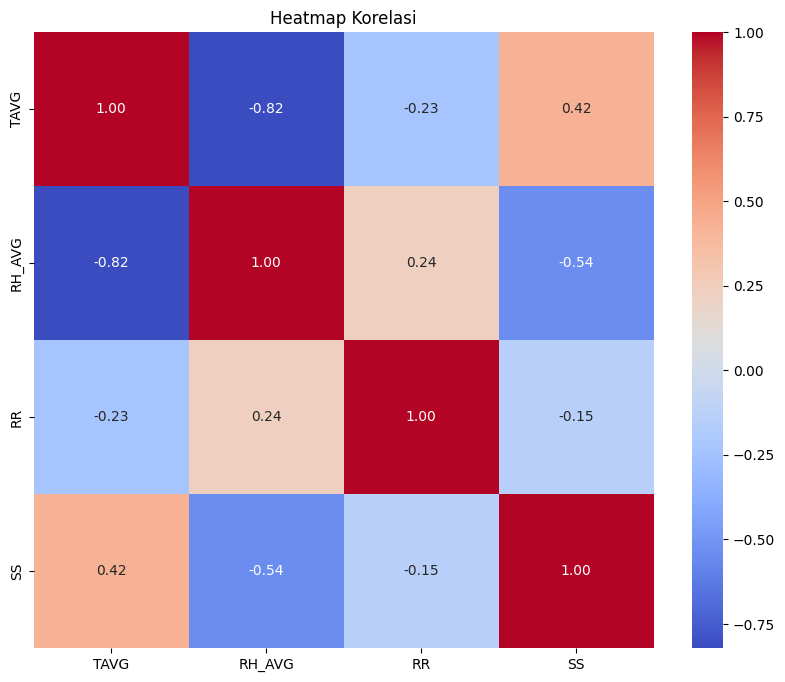

In [43]:
# Menghitung matriks korelasi
correlation_matrix4 = data_2023.corr(numeric_only=True)

# Menampilkan matriks korelasi
correlation_matrix4

import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()


In [44]:
# Menghitung rata-rata berdasarkan bulan
import pandas as pd

# Tambahkan kolom "BULAN" berdasarkan kolom TANGGAL
data_2023['BULAN'] = data_2023['TANGGAL'].dt.month

# Kelompokkan berdasarkan bulan dan hitung rata-rata untuk setiap variabel
data2_2023 = data_2023.groupby('BULAN')[['TAVG', 'RH_AVG', 'RR', 'SS']].mean()

# Reset index untuk membuatnya lebih rapi (opsional)
data2_2023 = data2_2023.reset_index()

# Tampilkan hasil
print("Rata-rata bulanan:")
data2_2023

Rata-rata bulanan:


,BULAN,TAVG,RH_AVG,RR,SS
0,1,27.467742,85.645161,8.407692,3.503226
1,2,26.625000,88.892857,22.410000,2.317857
2,3,27.364516,83.870968,13.810526,4.270968
3,4,28.796667,77.433333,6.383333,5.540000
4,5,29.358065,82.129032,7.566667,4.551613
5,6,28.803333,82.500000,8.326667,5.233333
6,7,28.241935,80.580645,6.687500,5.216129
7,8,28.535484,76.580645,1.800000,7.070968
8,9,29.033333,72.833333,15.200000,7.400000
9,10,30.363333,71.433333,4.466667,8.020000


In [45]:
# Hitung baseline tahunan untuk setiap bulan (rata-rata suhu bulanan per bulan)
baseline_tahun = data2_2023.groupby('BULAN')['TAVG'].mean().reset_index()
baseline_tahun.rename(columns={'TAVG': 'baseline_tahun'}, inplace=True)

# Gabungkan baseline dengan data bulanan
data2_2023 = pd.merge(data2_2023, baseline_tahun, on='BULAN')
data2_2023['Anomali_Suhu'] = data2_2023['TAVG'] - data2_2023['baseline_tahun']

# Cetak hasil
data2_2023

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu
0,1,27.467742,85.645161,8.407692,3.503226,27.467742,0.0
1,2,26.625000,88.892857,22.410000,2.317857,26.625000,0.0
2,3,27.364516,83.870968,13.810526,4.270968,27.364516,0.0
3,4,28.796667,77.433333,6.383333,5.540000,28.796667,0.0
4,5,29.358065,82.129032,7.566667,4.551613,29.358065,0.0
5,6,28.803333,82.500000,8.326667,5.233333,28.803333,0.0
6,7,28.241935,80.580645,6.687500,5.216129,28.241935,0.0
7,8,28.535484,76.580645,1.800000,7.070968,28.535484,0.0
8,9,29.033333,72.833333,15.200000,7.400000,29.033333,0.0
9,10,30.363333,71.433333,4.466667,8.020000,30.363333,0.0


In [46]:
data2_2023['TAHUN'] = data_2023['TANGGAL'].dt.year
data2_2023

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu,TAHUN
0,1,27.467742,85.645161,8.407692,3.503226,27.467742,0.0,2023
1,2,26.625000,88.892857,22.410000,2.317857,26.625000,0.0,2023
2,3,27.364516,83.870968,13.810526,4.270968,27.364516,0.0,2023
3,4,28.796667,77.433333,6.383333,5.540000,28.796667,0.0,2023
4,5,29.358065,82.129032,7.566667,4.551613,29.358065,0.0,2023
5,6,28.803333,82.500000,8.326667,5.233333,28.803333,0.0,2023
6,7,28.241935,80.580645,6.687500,5.216129,28.241935,0.0,2023
7,8,28.535484,76.580645,1.800000,7.070968,28.535484,0.0,2023
8,9,29.033333,72.833333,15.200000,7.400000,29.033333,0.0,2023
9,10,30.363333,71.433333,4.466667,8.020000,30.363333,0.0,2023


### 2024

In [47]:
data_2024

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2024,24.7,32.1,30.2,78,21,6.6,2,310,1,C
1,02-01-2024,25.6,33.2,30.5,77,-,0.7,3,170,1,C
2,03-01-2024,25.2,30.0,27.9,86,10.7,1,2,290,1,C
3,04-01-2024,25.2,30.9,27,88,4.6,0.1,3,290,1,C
4,05-01-2024,23.7,35.5,29.1,78,53.8,0,5,230,1,C
...,...,...,...,...,...,...,...,...,...,...,...
361,27-12-2024,25.6,33.6,28.8,77,-,1.6,4,330,2,W
362,28-12-2024,26.2,34.4,29.6,68,-,6.7,5,260,2,W
363,29-12-2024,26.6,32.4,29,76,-,6.3,3,290,2,NW
364,30-12-2024,25.4,31.2,27.5,79,-,1.9,6,250,3,W


In [48]:
data_2024 = data_2024.drop(['DDD_CAR', 'FF_AVG', 'DDD_X', 'FF_X', 'TX', 'TN'], axis=1)

In [49]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  366 non-null    object
 1   TAVG     366 non-null    object
 2   RH_AVG   366 non-null    object
 3   RR       366 non-null    object
 4   SS       366 non-null    object
dtypes: object(5)
memory usage: 14.4+ KB


In [50]:
data_2024['TANGGAL'] = pd.to_datetime(data_2024['TANGGAL'], format="%d-%m-%Y")
data_2024['TAVG'] = pd.to_numeric(data_2024['TAVG'],errors='coerce')
data_2024['RH_AVG'] = pd.to_numeric(data_2024['RH_AVG'],errors='coerce')
data_2024['RR'] = pd.to_numeric(data_2024['RR'],errors='coerce')
data_2024['SS'] = pd.to_numeric(data_2024['SS'],errors='coerce')

In [51]:
import numpy as np

# Pilih semua kolom kecuali 'Tanggal'
clean_2024 = data_2024.columns.difference(['Tanggal'])

# Ganti nilai kosong menjadi NaN di kolom yang dipilih
data_2024[clean_2024] = data_2024[clean_2024].replace(["", " ", "-", 8888, 9999, 8888.0, 9999.0], np.nan)

In [52]:
data_2024.isnull().sum()

,0
TANGGAL,0
TAVG,1
RH_AVG,1
RR,200
SS,4


In [53]:
data_2024.describe()

,TANGGAL,TAVG,RH_AVG,RR,SS
count,366,365.000000,365.000000,166.000000,362.000000
mean,2024-07-01 12:00:00.000000256,29.178356,78.008219,16.329518,4.855801
min,2024-01-01 00:00:00,24.600000,52.000000,0.000000,0.000000
25%,2024-04-01 06:00:00,28.300000,73.000000,3.000000,2.800000
50%,2024-07-01 12:00:00,29.100000,78.000000,8.900000,5.100000
75%,2024-09-30 18:00:00,30.200000,83.000000,20.950000,7.200000
max,2024-12-31 00:00:00,32.300000,95.000000,108.500000,11.100000
std,NaN,1.432184,7.018612,20.614767,2.713888


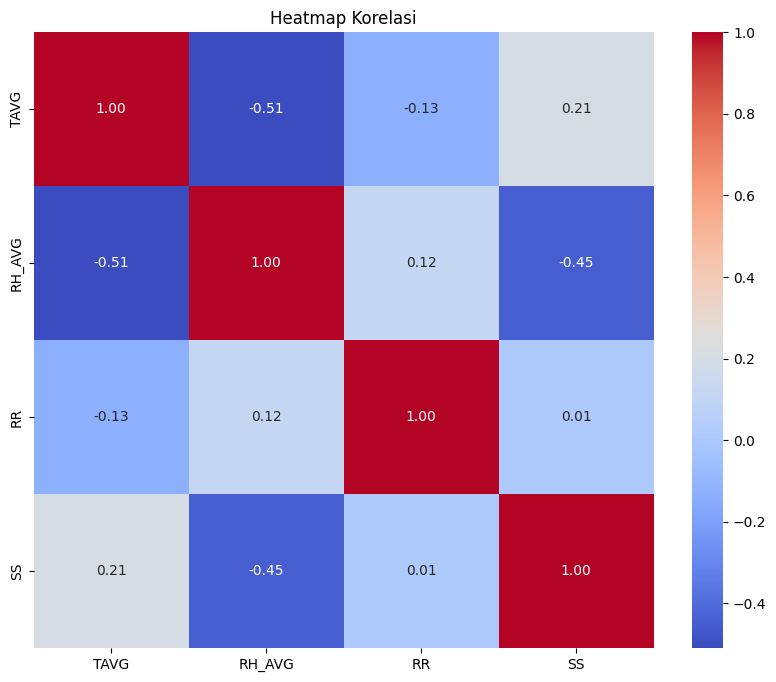

In [54]:
# Menghitung matriks korelasi
correlation_matrix5 = data_2024.corr(numeric_only=True)

# Menampilkan matriks korelasi
correlation_matrix5

import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix5, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

In [55]:
# Menghitung rata-rata berdasarkan bulan
import pandas as pd

# Tambahkan kolom "BULAN" berdasarkan kolom TANGGAL
data_2024['BULAN'] = data_2024['TANGGAL'].dt.month

# Kelompokkan berdasarkan bulan dan hitung rata-rata untuk setiap variabel
data2_2024 = data_2024.groupby('BULAN')[['TAVG', 'RH_AVG', 'RR', 'SS']].mean()

# Reset index untuk membuatnya lebih rapi (opsional)
data2_2024 = data2_2024.reset_index()

# Tampilkan hasil
print("Rata-rata bulanan:")
data2_2024

Rata-rata bulanan:


,BULAN,TAVG,RH_AVG,RR,SS
0,1,28.903226,80.032258,21.525000,3.990323
1,2,29.327586,82.068966,11.800000,3.844828
2,3,28.993548,82.806452,19.434783,3.816129
3,4,30.116667,81.600000,19.863158,4.286667
4,5,31.070968,77.290323,8.142857,4.764516
5,6,30.110000,78.933333,9.542857,4.920000
6,7,28.333333,73.966667,33.800000,6.126667
7,8,28.719355,71.322581,12.833333,6.532258
8,9,28.916667,73.900000,14.111111,6.200000
9,10,29.758065,72.451613,5.200000,6.403226


In [56]:
# Hitung baseline tahunan untuk setiap bulan (rata-rata suhu bulanan per bulan)
baseline_tahun = data2_2024.groupby('BULAN')['TAVG'].mean().reset_index()
baseline_tahun.rename(columns={'TAVG': 'baseline_tahun'}, inplace=True)

# Gabungkan baseline dengan data bulanan
data2_2024 = pd.merge(data2_2024, baseline_tahun, on='BULAN')
data2_2024['Anomali_Suhu'] = data2_2024['TAVG'] - data2_2024['baseline_tahun']

# Cetak hasil
data2_2024

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu
0,1,28.903226,80.032258,21.525000,3.990323,28.903226,0.0
1,2,29.327586,82.068966,11.800000,3.844828,29.327586,0.0
2,3,28.993548,82.806452,19.434783,3.816129,28.993548,0.0
3,4,30.116667,81.600000,19.863158,4.286667,30.116667,0.0
4,5,31.070968,77.290323,8.142857,4.764516,31.070968,0.0
5,6,30.110000,78.933333,9.542857,4.920000,30.110000,0.0
6,7,28.333333,73.966667,33.800000,6.126667,28.333333,0.0
7,8,28.719355,71.322581,12.833333,6.532258,28.719355,0.0
8,9,28.916667,73.900000,14.111111,6.200000,28.916667,0.0
9,10,29.758065,72.451613,5.200000,6.403226,29.758065,0.0


In [57]:
data2_2024['TAHUN'] = data_2024['TANGGAL'].dt.year
data2_2024

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu,TAHUN
0,1,28.903226,80.032258,21.525000,3.990323,28.903226,0.0,2024
1,2,29.327586,82.068966,11.800000,3.844828,29.327586,0.0,2024
2,3,28.993548,82.806452,19.434783,3.816129,28.993548,0.0,2024
3,4,30.116667,81.600000,19.863158,4.286667,30.116667,0.0,2024
4,5,31.070968,77.290323,8.142857,4.764516,31.070968,0.0,2024
5,6,30.110000,78.933333,9.542857,4.920000,30.110000,0.0,2024
6,7,28.333333,73.966667,33.800000,6.126667,28.333333,0.0,2024
7,8,28.719355,71.322581,12.833333,6.532258,28.719355,0.0,2024
8,9,28.916667,73.900000,14.111111,6.200000,28.916667,0.0,2024
9,10,29.758065,72.451613,5.200000,6.403226,29.758065,0.0,2024


### Gabungkan data

In [58]:
# Gabungkan semua data
df = pd.concat([data2_2020, data2_2021, data2_2022, data2_2023, data2_2024])

# Pratinjau data
df

,BULAN,TAVG,RH_AVG,RR,SS,baseline_tahun,Anomali_Suhu,TAHUN
0,1,27.363333,86.400000,16.730769,3.446667,27.363333,0.0,2020
1,2,27.093103,87.103448,20.540909,2.903448,27.093103,0.0,2020
2,3,27.809677,83.935484,12.600000,4.203226,27.809677,0.0,2020
3,4,28.183333,82.766667,14.500000,5.246667,28.183333,0.0,2020
4,5,28.583871,80.419355,9.894444,4.758065,28.583871,0.0,2020
5,6,28.706667,76.500000,2.813333,5.190000,28.706667,0.0,2020
6,7,28.373333,74.193548,2.962500,5.803226,28.373333,0.0,2020
7,8,28.506897,74.032258,4.761111,7.019355,28.506897,0.0,2020
8,9,30.453333,66.333333,10.635294,6.450000,30.453333,0.0,2020
9,10,27.924242,79.181818,23.322727,5.253125,27.924242,0.0,2020


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 11
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BULAN           60 non-null     int32  
 1   TAVG            60 non-null     float64
 2   RH_AVG          60 non-null     float64
 3   RR              60 non-null     float64
 4   SS              60 non-null     float64
 5   baseline_tahun  60 non-null     float64
 6   Anomali_Suhu    60 non-null     float64
 7   TAHUN           60 non-null     int32  
dtypes: float64(6), int32(2)
memory usage: 3.8 KB


## Simpan Data

In [61]:
# Menyimpan DataFrame ke file CSV
df.to_csv('Stasiun Klimatologi Banten - Stadarisasi Rata-Rata.csv', index=False)

from google.colab import files

# Unduh file CSV
files.download('Stasiun Klimatologi Banten - Stadarisasi Rata-Rata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>